In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.orm import Session
from pprint import pprint
import pandas as pd

In [2]:
# Import Hawaii Station Data

from station_model import Hawaii_Station

engine_s = create_engine("sqlite:///hawaii.sqlite")
conn_s = engine_s.connect()
session_s = Session(bind=engine_s)

station_data = session_s.query(Hawaii_Station).limit(10)
for row in station_data:
    pprint(row.__dict__)


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fec80de8290>,
 'elevation': 3.0,
 'id': 1,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fec80de8490>,
 'elevation': 14.6,
 'id': 2,
 'latitude': 21.4234,
 'longitude': -157.8015,
 'name': 'KANEOHE 838.1, HI US',
 'station': 'USC00513117'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fec80de8510>,
 'elevation': 7.0,
 'id': 3,
 'latitude': 21.5213,
 'longitude': -157.8374,
 'name': 'KUALOA RANCH HEADQUARTERS 886.9, HI US',
 'station': 'USC00514830'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fec80de8590>,
 'elevation': 11.9,
 'id': 4,
 'latitude': 21.3934,
 'longitude': -157.9751,
 'name': 'PEARL CITY, HI US',
 'station': 'USC00517948'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fec80de8610>,
 'elevati

In [3]:
# Import Hawaii Measurement Data

from measurement_model import Hawaii_Measurement

engine_m = create_engine("sqlite:///hawaii.sqlite")
conn_m = engine_m.connect()
session_m = Session(bind=engine_m)

measurement_data = session_m.query(Hawaii_Measurement).limit(10)
for row in measurement_data:
    pprint(row.__dict__)


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fec81916290>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fec80d88090>,
 'date': '2010-01-02',
 'id': 2,
 'prcp': 0.0,
 'station': 'USC00519397',
 'tobs': 63.0}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fec80d88110>,
 'date': '2010-01-03',
 'id': 3,
 'prcp': 0.0,
 'station': 'USC00519397',
 'tobs': 74.0}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fec80d88190>,
 'date': '2010-01-04',
 'id': 4,
 'prcp': 0.0,
 'station': 'USC00519397',
 'tobs': 76.0}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fec80d88210>,
 'date': '2010-01-06',
 'id': 5,
 'prcp': None,
 'station': 'USC00519397',
 'tobs': 73.0}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fec80d882d0>,
 'date': '2010-01-07',
 'id': 6,
 'pr

# Exploratory Climate Analysis

In [4]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Get the last 12 months of data

measurement_df1 = pd.read_sql("SELECT * FROM measurement", conn_m).dropna(how = 'any') 
# print(measurement_df1)
# print(measurement_df1.head())

# Get max date from table
max_df = pd.read_sql("SELECT max(date) FROM measurement", conn_m)
print(max_df)

    max(date)
0  2017-08-23


In [5]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame

measurement_df2 = pd.read_sql("""
SELECT date, prcp 
FROM measurement 
WHERE date between '2016-08-23' and '2017-08-23'
""", conn_m)
# print(measurement_df1)
print(measurement_df1.head())

   id      station        date  prcp  tobs
0   1  USC00519397  2010-01-01  0.08  65.0
1   2  USC00519397  2010-01-02  0.00  63.0
2   3  USC00519397  2010-01-03  0.00  74.0
3   4  USC00519397  2010-01-04  0.00  76.0
5   6  USC00519397  2010-01-07  0.06  70.0


In [6]:
# Set the index to the date column and sort the dataframe by date

measurement_df3 = measurement_df2.sort_values(by = 'date').dropna(how = 'any').set_index('date')
print(measurement_df3.head())

            prcp
date            
2016-08-23  0.00
2016-08-23  1.79
2016-08-23  0.05
2016-08-23  0.15
2016-08-23  0.70


In [7]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(measurement_df2.describe())

              prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


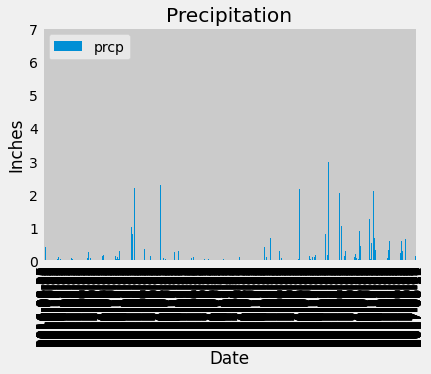

In [8]:
# Use Pandas Plotting with Matplotlib to plot the data

measurement_df2.plot(
    x="date",
    y='prcp',
    kind="bar",
    title="Precipitation"
)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

<AxesSubplot:xlabel='date'>

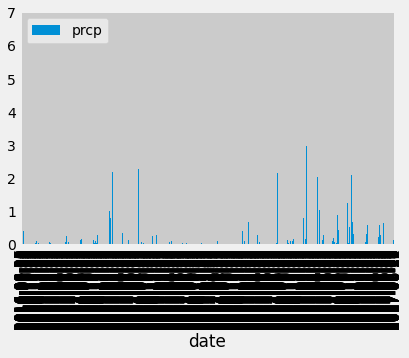

In [9]:
measurement_df2.plot.bar(x = 'date', y = 'prcp')

In [10]:
# Design a query to show how many stations are available in this dataset?

# Get all station data
station_count = pd.read_sql("SELECT COUNT(station) FROM station",conn_s)
# print(station_count)
print(station_count.head())

   COUNT(station)
0               9


In [11]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# all_df = pd.read_sql("SELECT sub.* FROM (SELECT m.id, m.station, date, prcp, tobs, name, latitude, longitude, elevation, COUNT(m.station) as station_count FROM measurement AS m LEFT OUTER JOIN station AS s ON m.station = s.station GROUP BY m.id, m.station, date, prcp, tobs, name, latitude, longitude, elevation) as sub ORDER BY station_count", conn_m).dropna(how = 'any') 
all_df = pd.read_sql("""
SELECT sub.* 
FROM (
        SELECT m.station, COUNT(m.station) as station_count 
        FROM measurement AS m 
            LEFT OUTER JOIN station AS s ON m.station = s.station 
            GROUP BY m.station
            ) as sub
ORDER BY station_count desc
""", conn_m).dropna(how = 'any') 
print(all_df)

       station  station_count
0  USC00519281           2772
1  USC00519397           2724
2  USC00513117           2709
3  USC00519523           2669
4  USC00516128           2612
5  USC00514830           2202
6  USC00511918           1979
7  USC00517948           1372
8  USC00518838            511


In [12]:
# Design a query to retrieve the last 12 months of temperature observation data (TOBS).
# Filter by the station with the highest number of observations.

tobs_df = pd.read_sql("""
SELECT station, date, tobs
FROM measurement 
WHERE station = 'USC00519281' and date between '2016-08-23' and '2017-08-23'
""", conn_m).dropna(how = 'any') 
print(tobs_df)

         station        date  tobs
0    USC00519281  2016-08-23  77.0
1    USC00519281  2016-08-24  77.0
2    USC00519281  2016-08-25  80.0
3    USC00519281  2016-08-26  80.0
4    USC00519281  2016-08-27  75.0
..           ...         ...   ...
347  USC00519281  2017-08-14  77.0
348  USC00519281  2017-08-15  77.0
349  USC00519281  2017-08-16  76.0
350  USC00519281  2017-08-17  76.0
351  USC00519281  2017-08-18  79.0

[352 rows x 3 columns]


array([[<AxesSubplot:title={'center':'tobs'}>]], dtype=object)

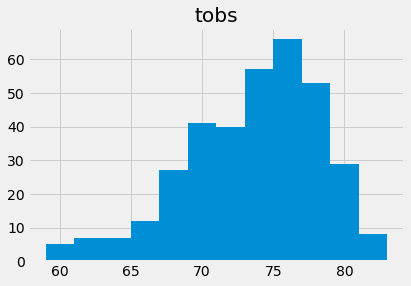

In [13]:
# Plot the results as a histogram with bins=12

tobs_df.hist(bins=12)


# Flask App

In [14]:
from flask import Flask
app = Flask(__name__)

@app.route("/")
def home():
    return """
    <h1>Welcome to my climate analysis! For more information, go to one of these routes: </h1><br>
    <ul>
    <li>/api/v1.0/precipitation - a dictionary of date and preciptation</li>
    <li>/api/v1.0/stations - a list of stations</li>
    <li>/api/v1.0/tobs - dates and temperature observations from most active station last year</li>
    <li>/api/v1.0/<start> - the minimum temperature, the average temperature, and the max temperature for a given start range.</li>
    <li>/api/v1.0/<start>/<end> - the minimum temperature, the average temperature, and the max temperature for a given start-end range.</li>
    </ul>
    """

@app.route("/api/v1.0/precipitation")
def precip():
    for row in measurement_data:
    pprint(row.__dict__)

@app.route("/api/v1.0/stations")
def stat():
    for row in station_data:
    pprint(row.__dict__)

@app.route("/api/v1.0/tobs")
def toobs():
    all_df = pd.read_sql("""
SELECT sub.* 
FROM (
        SELECT m.station, COUNT(m.station) as station_count 
        FROM measurement AS m 
            LEFT OUTER JOIN station AS s ON m.station = s.station 
            GROUP BY m.station
            ) as sub
ORDER BY station_count desc
""", conn_m).dropna(how = 'any') 
    return all_df

@app.route("/api/v1.0/<start>")
def tempdate1(start):
    return jsonify([d for d in measurement if measurement["date"] == start or measurement["date"] > start]).mean()
    return jsonify([d for d in measurement if measurement["date"] == start or measurement["date"] > start]).min()
    return jsonify([d for d in measurement if measurement["date"] == start or measurement["date"] > start]).max()

@app.route("/api/v1.0/<start>/<end>")
def tempdate1(start, end):
    return jsonify([d for d in measurement if (measurement["date"] == start or measurement["date"] > start) and (measurement["date"] == end or measurement["date"] < end)]).mean()
    return jsonify([d for d in measurement if (measurement["date"] == start or measurement["date"] > start) and (measurement["date"] == end or measurement["date"] < end)]).min()
    return jsonify([d for d in measurement if (measurement["date"] == start or measurement["date"] > start) and (measurement["date"] == end or measurement["date"] < end)]).max()
    
if __name__ == "__main__":
    app.run(debug = True)


## Bonus Challenge Assignment

In [15]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'session' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
